# Assignment 2

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Question 1: DFT leakage, noisy signal, spectrum
Note: You might want to study the reading material on Spectrum Analysing using DFT.
Suppose the signal of interest x(t) consists of 3 sinusoid components, i.e.
x(t) = sin(2pf1t) + sin(2pf2t) + 2 sin(2pf3t) with the three frequencies f1=5 kHz, f2=5.5
kHz, and f3=10 kHz. Assume the sampling frequency is fs=32 kHz.


### (a) Write down x(n), and plot x(n) for n=0, 1, …, N-1, with N =32, 64, 128 respectively.


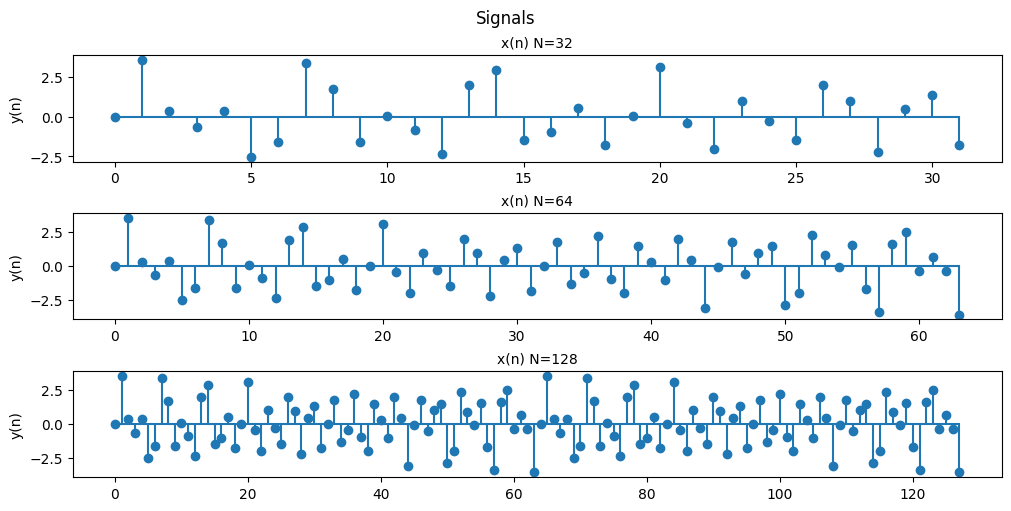

In [4]:
# Define frequencies
f1 = 5000; f2 = 5500; f3 = 10000;
Fs = 32000;
# setting our sample times
ts = np.arange(0, 128*1/Fs, 1/Fs)
n = np.arange(0, 128, 1)

x_n = np.sin(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts) + 2*np.sin(2*np.pi*f3*ts);

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('x(n) N=32', fontsize='medium')
ax[0].set_ylabel('y(n)')
ax[0].stem(n[0:32], x_n[0:32], basefmt = '')

ax[1].set_title('x(n) N=64', fontsize='medium')
ax[1].set_ylabel('y(n)')
ax[1].stem(n[0:64], x_n[0:64], basefmt = '')

ax[2].set_title('x(n) N=128', fontsize='medium')
ax[2].set_ylabel('y(n)')
ax[2].stem(n, x_n, basefmt = '')

plt.show()

### (b) What is the corresponding frequency resolution? For N=32, 64, and 128, plot the corresponding magnitude spectrums of {x(n)}.
Comment on the results.

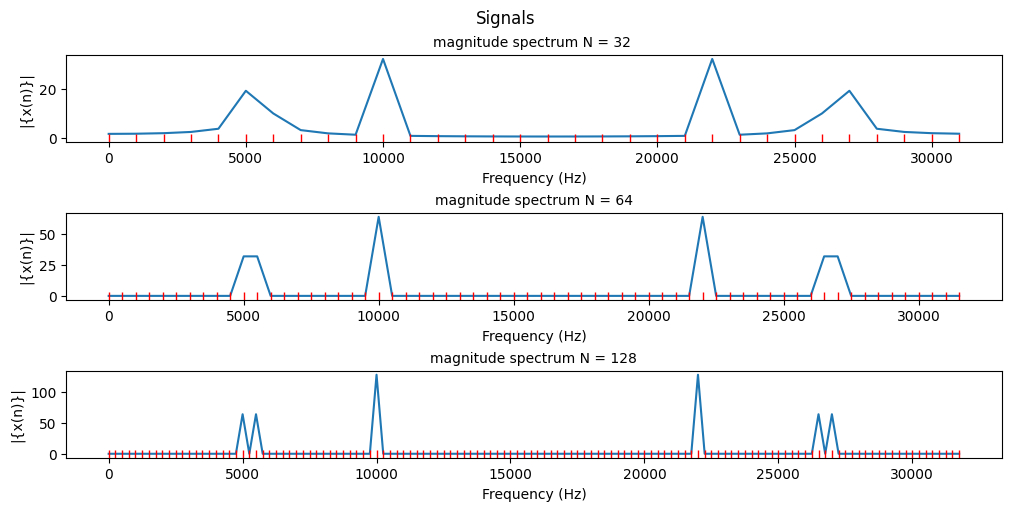

In [5]:
# setting out the ffts
y_n1 = np.abs(np.fft.fft(x_n[0:32]))
y_n2 = np.abs(np.fft.fft(x_n[0:64]))
y_n3 = np.abs(np.fft.fft(x_n))

# key step to make sure the frequencies of our FFT match up properly
f1 = n[0:32]*Fs/32
f2 = n[0:64]*Fs/64
f3 = n[0:128]*Fs/128

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('magnitude spectrum N = 32 ', fontsize='medium')
ax[0].set_ylabel('|{x(n)}|')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].plot(f1, y_n1)
ax[0].plot(f1, np.zeros(32), '|r')

ax[1].set_title('magnitude spectrum N = 64', fontsize='medium')
ax[1].set_ylabel('|{x(n)}|')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].plot(f2, y_n2)
ax[1].plot(f2, np.zeros(64), '|r')

ax[2].set_title('magnitude spectrum N = 128', fontsize='medium')
ax[2].set_ylabel('|{x(n)}|')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].plot(f3, y_n3)
ax[2].plot(f3, np.zeros(128), '|r')

plt.show()

- notice how the resolution increases as we expand the window the FFT gets as an input. More points better clarity.
-  The frequency resolution is the sampling frequency divided by the length N of the FFT therefore the frequency resolutions are 1000Hz, 500Hz and 250Hz respectively, the magnitude spectrums are the FFT of the function. As illustrated by the red markers.
- FFTs are a method of quickly converting a time-domain signal into a frequency-domain representation.
- The symetrical points that occur are caused by the math involved in the FFT, FFTs are symmetrical by nature and what we are seeing is the negative component wrapping around from the end of our window.


### (c) For N=32, zero-padding {x(n)} to be with length 128 first, then plot the corresponding magnitude spectrum. Comment on the results when compared with N=128 in (b).




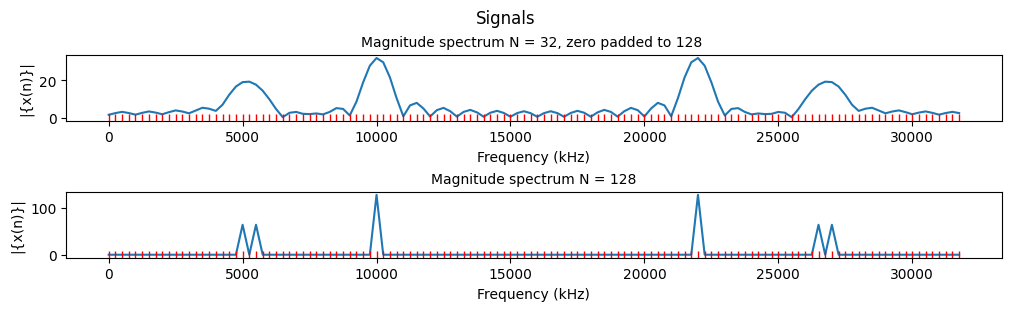

In [6]:
# setting out the ffts
y_n1 = np.abs(np.fft.fft(np.concatenate((x_n[0:32],np.zeros(96)))))
y_n3 = np.abs(np.fft.fft(x_n))

f3 = n[0:128]*Fs/128

fig, ax = plt.subplots(2, 1, figsize=(10, 3), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('Magnitude spectrum N = 32, zero padded to 128 ', fontsize='medium')
ax[0].set_ylabel('|{x(n)}|')
ax[0].set_xlabel('Frequency (kHz)')
ax[0].plot(f3, y_n1)
ax[0].plot(f3, np.zeros(128), '|r')

ax[1].set_title('Magnitude spectrum N = 128', fontsize='medium')
ax[1].set_ylabel('|{x(n)}|')
ax[1].set_xlabel('Frequency (kHz)')
ax[1].plot(f3, y_n3)
ax[1].plot(f3, np.zeros(128), '|r')

plt.show()

With zero padding we get an artificially higher resolution.

[zero padding extra reading](https://www.bitweenie.com/listings/fft-zero-padding/)

### (d) Study the effects of Gaussian white noise (WGN).
Generate a zero-mean white Gaussian noise sequence (use ‘randn’ in Matlab) with variance 1. For N=32, plot the noise sequence, the signal sequence of (a), and the result of adding the two signals.
Repeat (a) and (b) by using the above noisy signal.

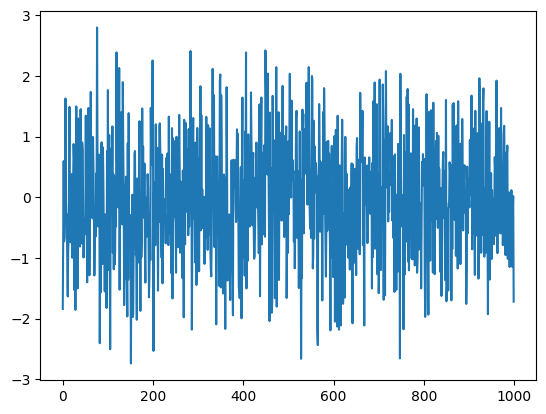

In [7]:
mean = 0
std = 1
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()


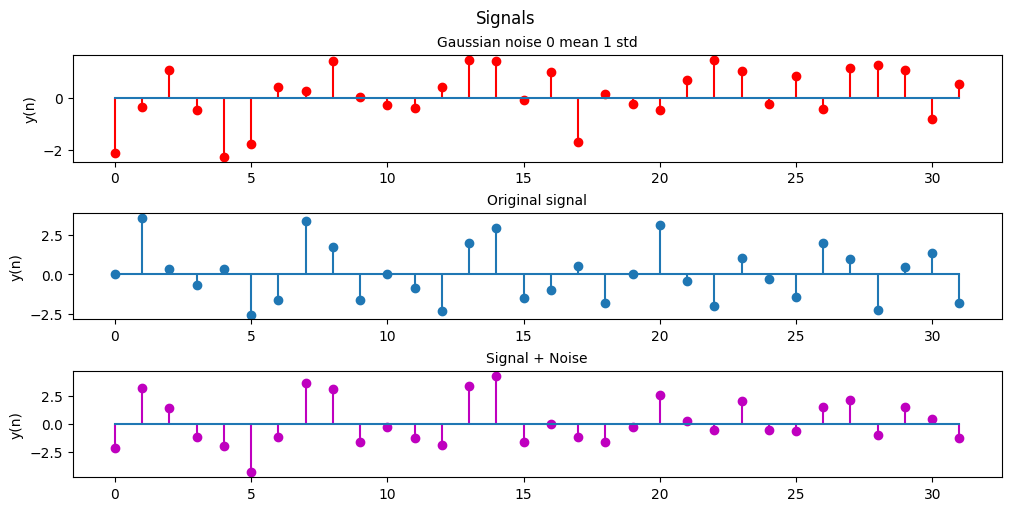

In [8]:
# Define frequencies
f1 = 5000; f2 = 5500; f3 = 10000;
Fs = 32000;
# setting our sample times
ts = np.arange(0, 128*1/Fs, 1/Fs)
n = np.arange(0, 128, 1)

noise = np.random.normal(0, 1, size=128)
x_n = np.sin(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts) + 2*np.sin(2*np.pi*f3*ts);
noisy_x_n = x_n + noise

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('Gaussian noise 0 mean 1 std', fontsize='medium')
ax[0].set_ylabel('y(n)')
ax[0].stem(n[0:32], noise[0:32], 'r', basefmt = '')

ax[1].set_title('Original signal', fontsize='medium')
ax[1].set_ylabel('y(n)')
ax[1].stem(n[0:32], x_n[0:32], basefmt = '')

ax[2].set_title('Signal + Noise', fontsize='medium')
ax[2].set_ylabel('y(n)')
ax[2].stem(n[0:32], noisy_x_n[0:32], 'm', basefmt = '')

plt.show()



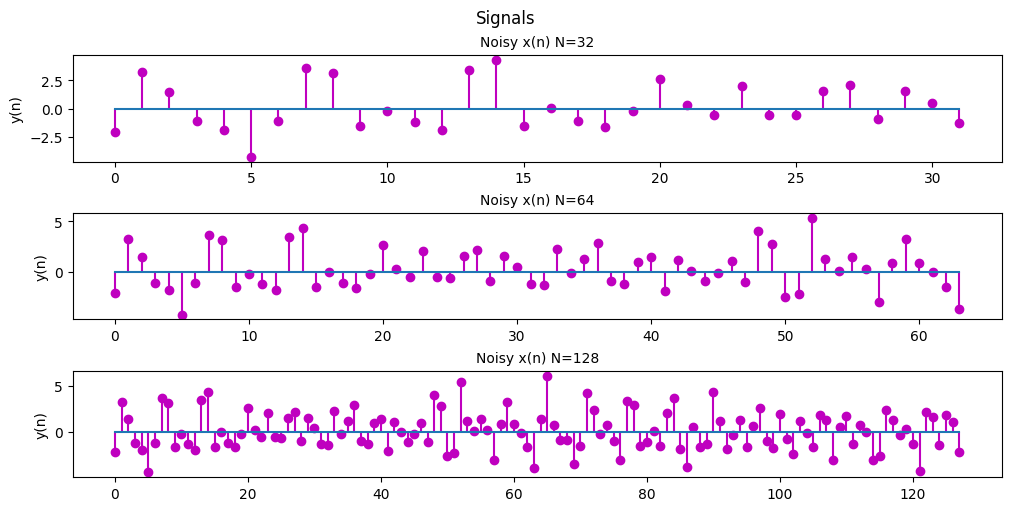

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('Noisy x(n) N=32', fontsize='medium')
ax[0].set_ylabel('y(n)')
ax[0].stem(n[0:32], noisy_x_n[0:32], 'm', basefmt = '')

ax[1].set_title('Noisy x(n) N=64', fontsize='medium')
ax[1].set_ylabel('y(n)')
ax[1].stem(n[0:64], noisy_x_n[0:64], 'm', basefmt = '')

ax[2].set_title('Noisy x(n) N=128', fontsize='medium')
ax[2].set_ylabel('y(n)')
ax[2].stem(n, noisy_x_n, 'm', basefmt = '')

plt.show()

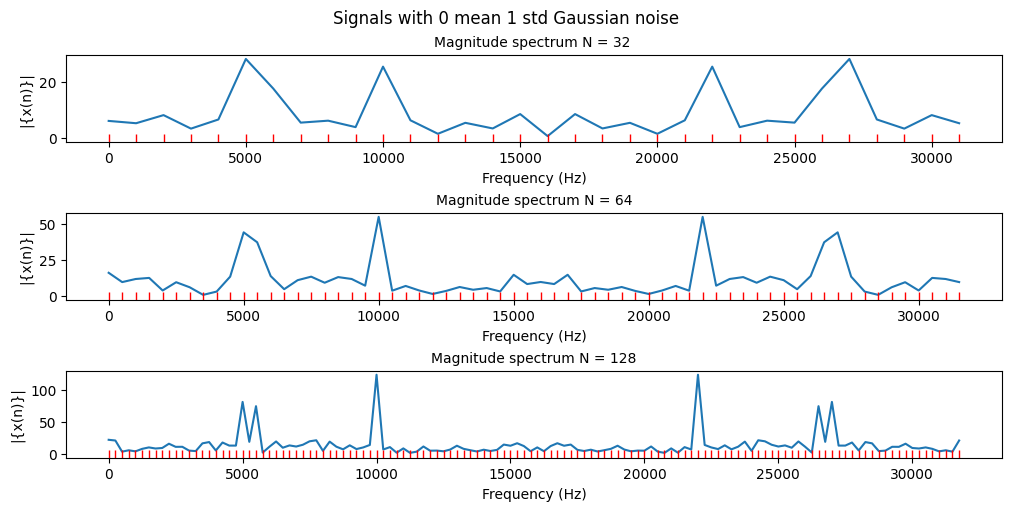

In [10]:
# setting out the ffts
y_n1 = np.abs(np.fft.fft(noisy_x_n[0:32]))
y_n2 = np.abs(np.fft.fft(noisy_x_n[0:64]))
y_n3 = np.abs(np.fft.fft(noisy_x_n))

# key step to make sure the frequencies of our FFT match up properly
f1 = n[0:32]*Fs/32
f2 = n[0:64]*Fs/64
f3 = n[0:128]*Fs/128

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals with 0 mean 1 std Gaussian noise')

ax[0].set_title('Magnitude spectrum N = 32 ', fontsize='medium')
ax[0].set_ylabel('|{x(n)}|')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].plot(f1, y_n1)
ax[0].plot(f1, np.zeros(32), '|r')

ax[1].set_title('Magnitude spectrum N = 64', fontsize='medium')
ax[1].set_ylabel('|{x(n)}|')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].plot(f2, y_n2)
ax[1].plot(f2, np.zeros(64), '|r')

ax[2].set_title('Magnitude spectrum N = 128', fontsize='medium')
ax[2].set_ylabel('|{x(n)}|')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].plot(f3, y_n3)
ax[2].plot(f3, np.zeros(128), '|r')

plt.show()

We can see that with a 0 mean 1 standard deviation gaussian white noise we see some spectral noise in our frequency spectrum. Although as the noise is centered around 0 and is relatively low power (only 1 standard deviation) compared to our signal so it's still fairly easy to distinguish the main frequencies of our original signal.

The noise becomes less of an issue as we increase the frequency resolution and we have more points between peaks.

### (e) Repeat the steps in (d) but for a WGN signal of mean 1 and variance of 10.
Comments on your results.

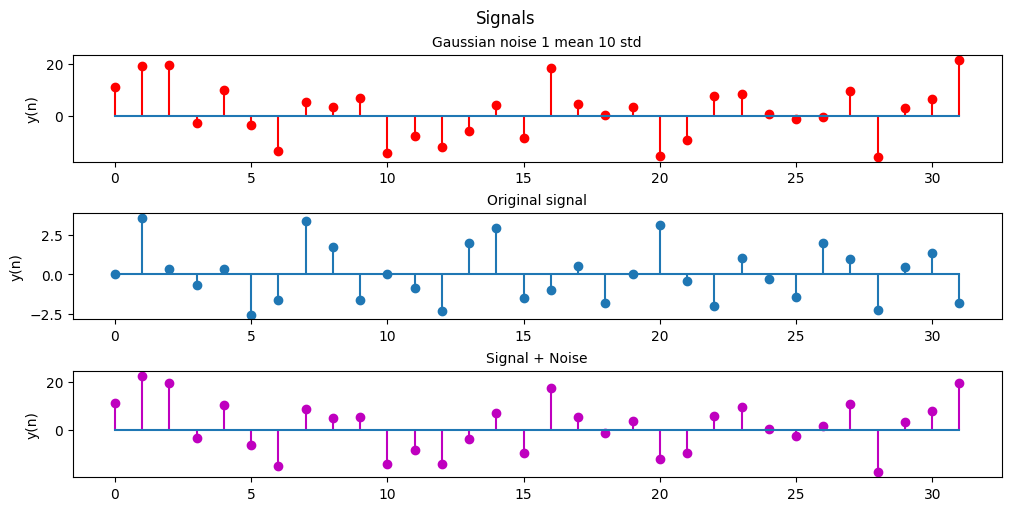

In [11]:
# Define frequencies
f1 = 5000; f2 = 5500; f3 = 10000;
Fs = 32000;
# setting our sample times
ts = np.arange(0, 128*1/Fs, 1/Fs)
n = np.arange(0, 128, 1)

noise = np.random.normal(1, 10, size=128)
x_n = np.sin(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts) + 2*np.sin(2*np.pi*f3*ts);
noisy_x_n = x_n + noise

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('Gaussian noise 1 mean 10 std', fontsize='medium')
ax[0].set_ylabel('y(n)')
ax[0].stem(n[0:32], noise[0:32], 'r', basefmt = '')

ax[1].set_title('Original signal', fontsize='medium')
ax[1].set_ylabel('y(n)')
ax[1].stem(n[0:32], x_n[0:32], basefmt = '')

ax[2].set_title('Signal + Noise', fontsize='medium')
ax[2].set_ylabel('y(n)')
ax[2].stem(n[0:32], noisy_x_n[0:32], 'm', basefmt = '')

plt.show()



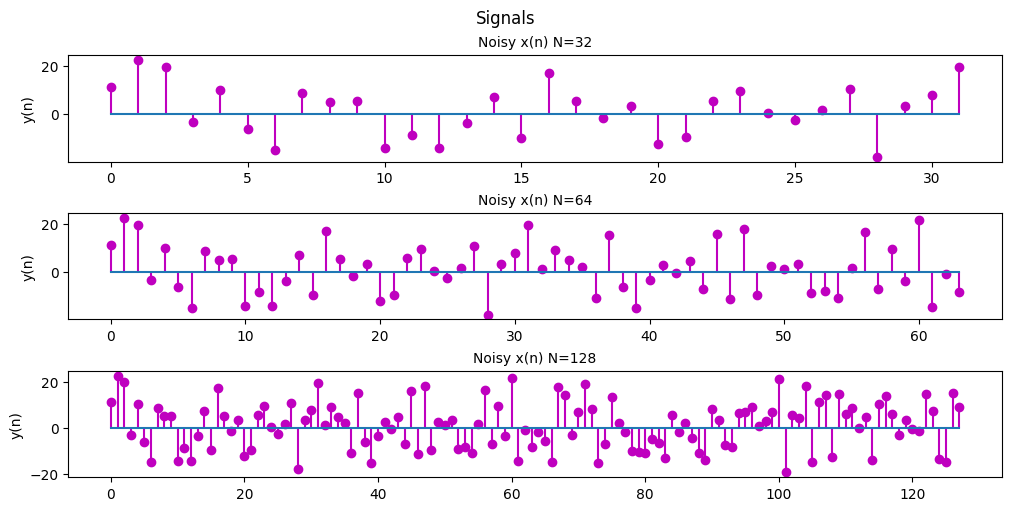

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

ax[0].set_title('Noisy x(n) N=32', fontsize='medium')
ax[0].set_ylabel('y(n)')
ax[0].stem(n[0:32], noisy_x_n[0:32], 'm', basefmt = '')

ax[1].set_title('Noisy x(n) N=64', fontsize='medium')
ax[1].set_ylabel('y(n)')
ax[1].stem(n[0:64], noisy_x_n[0:64], 'm', basefmt = '')

ax[2].set_title('Noisy x(n) N=128', fontsize='medium')
ax[2].set_ylabel('y(n)')
ax[2].stem(n, noisy_x_n, 'm', basefmt = '')

plt.show()

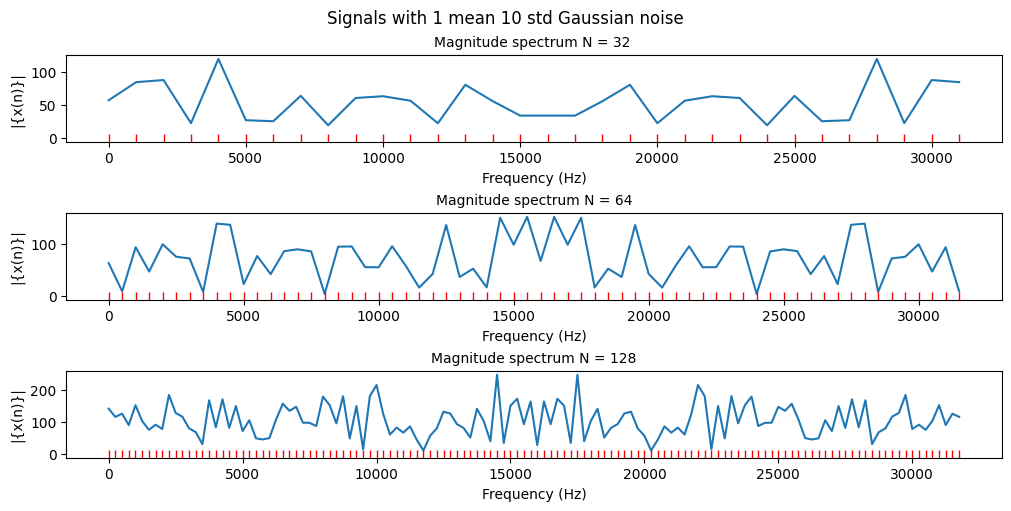

In [13]:
# setting out the ffts
y_n1 = np.abs(np.fft.fft(noisy_x_n[0:32]))
y_n2 = np.abs(np.fft.fft(noisy_x_n[0:64]))
y_n3 = np.abs(np.fft.fft(noisy_x_n))

# key step to make sure the frequencies of our FFT match up properly
f1 = n[0:32]*Fs/32
f2 = n[0:64]*Fs/64
f3 = n[0:128]*Fs/128

fig, ax = plt.subplots(3, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals with 1 mean 10 std Gaussian noise')

ax[0].set_title('Magnitude spectrum N = 32 ', fontsize='medium')
ax[0].set_ylabel('|{x(n)}|')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].plot(f1, y_n1)
ax[0].plot(f1, np.zeros(32), '|r')

ax[1].set_title('Magnitude spectrum N = 64', fontsize='medium')
ax[1].set_ylabel('|{x(n)}|')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].plot(f2, y_n2)
ax[1].plot(f2, np.zeros(64), '|r')

ax[2].set_title('Magnitude spectrum N = 128', fontsize='medium')
ax[2].set_ylabel('|{x(n)}|')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].plot(f3, y_n3)
ax[2].plot(f3, np.zeros(128), '|r')

plt.show()

Now that the average power of our noise is much higher it is much harder to distinguish our original signal from the noise. Even at a high resolution we have considerable noise because the average of our Gaussian noise is at 1 and our Gaussian noise is on average 10x stronger than our signal.

### (f) For the noisy signal as in (d) with N= 64 and 128, study the effects of different windows (e.g., Hamming, Hann and Blackman). Comments on your results.


So the main idea with windowing is that the math used for Fourier transforms assumes a function that goes to infinity where in practice we're using signals of finite lengths. Because of this we get a discontinuity at the end of our data sampling resulting in noise in our power spectrum calculations. To mitigate that we apply a window to our data which gives weight to our data depending on how close it is to the discontinuity.

That is why our Hann. Hamming, and Blackman windows appear to go to 0 at the start and end of the window and reach 1 at the center of the window. The plots below show how our data looks once we scale the samples by our windows.

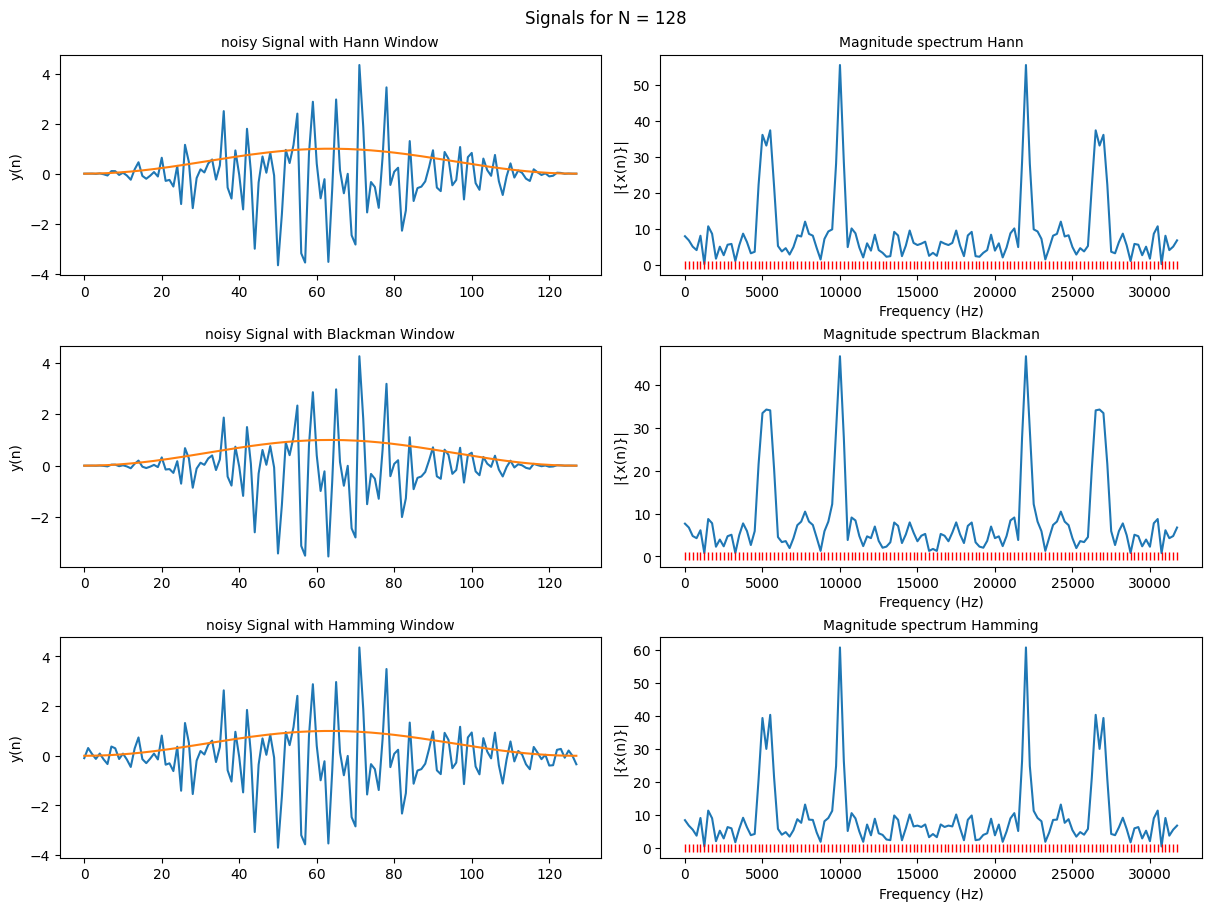

In [14]:
Hann = np.hanning(128)
Blackman = np.blackman(128)
Hamming = np.hamming(128)
# Define frequencies
f1 = 5000; f2 = 5500; f3 = 10000;
Fs = 32000;
# setting our sample times
ts = np.arange(0, 128*1/Fs, 1/Fs)
n = np.arange(0, 128, 1)
n = n[0:128]*Fs/128

noise = np.random.normal(0, 1, size=128)
x_n = np.sin(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts) + 2*np.sin(2*np.pi*f3*ts);
noisy_x_n = x_n + noise

y_n1 = np.abs(np.fft.fft(noisy_x_n*Hann))
y_n2 = np.abs(np.fft.fft(noisy_x_n*Blackman))
y_n3 = np.abs(np.fft.fft(noisy_x_n*Hamming))


fig, ax = plt.subplots(3, 2, figsize=(12, 9), layout='constrained')
fig.suptitle('Signals for N = 128')

ax[0][0].set_title('noisy Signal with Hann Window', fontsize='medium')
ax[0][0].set_ylabel('y(n)')
ax[0][0].plot(noisy_x_n*Hann)
ax[0][0].plot(Hann)

ax[1][0].set_title('noisy Signal with Blackman Window', fontsize='medium')
ax[1][0].set_ylabel('y(n)')
ax[1][0].plot(noisy_x_n*Blackman)
ax[1][0].plot(Hann)

ax[2][0].set_title('noisy Signal with Hamming Window', fontsize='medium')
ax[2][0].set_ylabel('y(n)')
ax[2][0].plot(noisy_x_n*Hamming)
ax[2][0].plot(Hann)

ax[0][1].set_title('Magnitude spectrum Hann', fontsize='medium')
ax[0][1].set_ylabel('|{x(n)}|')
ax[0][1].set_xlabel('Frequency (Hz)')
ax[0][1].plot(n, y_n1)
ax[0][1].plot(n, np.zeros(128), '|r')

ax[1][1].set_title('Magnitude spectrum Blackman', fontsize='medium')
ax[1][1].set_ylabel('|{x(n)}|')
ax[1][1].set_xlabel('Frequency (Hz)')
ax[1][1].plot(n, y_n2)
ax[1][1].plot(n, np.zeros(128), '|r')

ax[2][1].set_title('Magnitude spectrum Hamming', fontsize='medium')
ax[2][1].set_ylabel('|{x(n)}|')
ax[2][1].set_xlabel('Frequency (Hz)')
ax[2][1].plot(n, y_n3)
ax[2][1].plot(n, np.zeros(128), '|r')

plt.show()

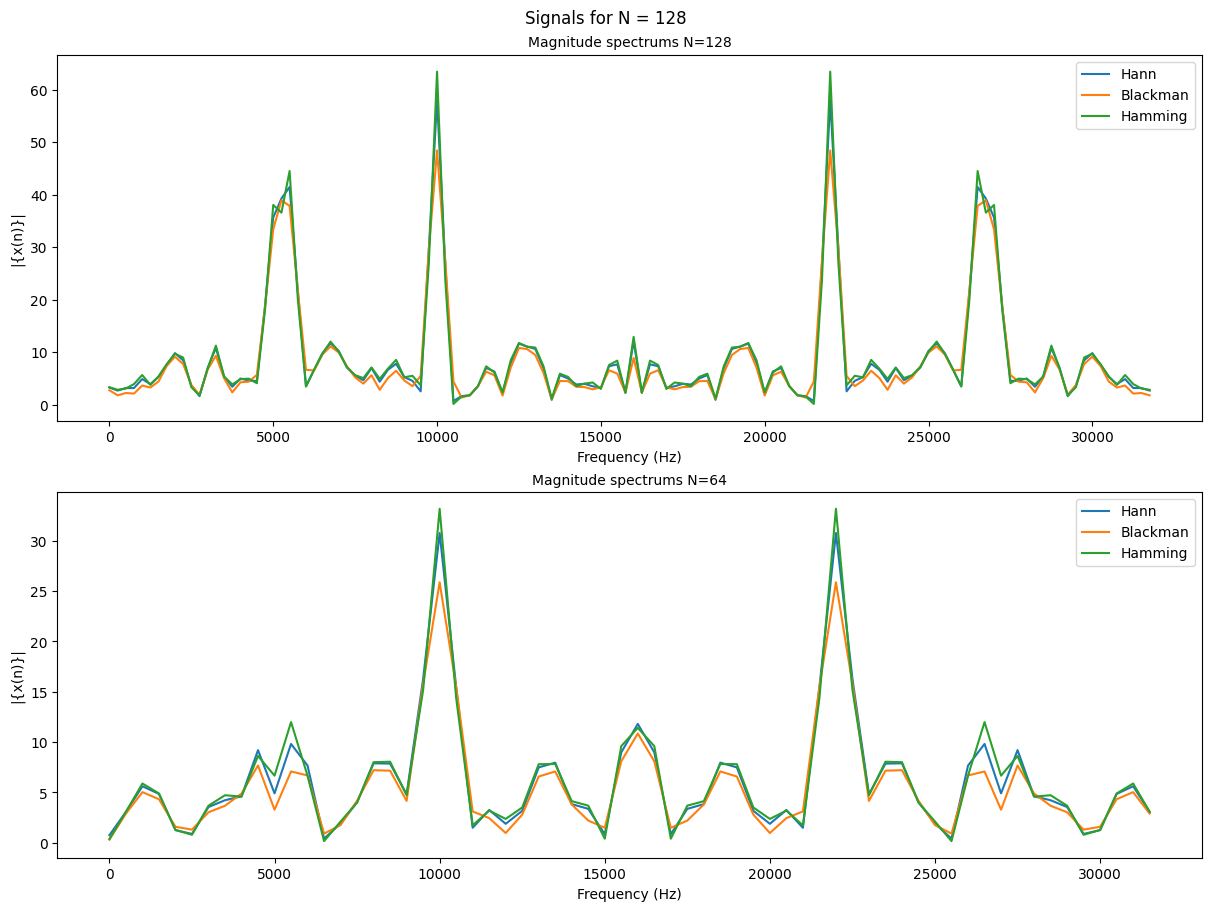

In [15]:
# Define frequencies
f1 = 5000; f2 = 5500; f3 = 10000;
Fs = 32000;
# setting our sample times
ts = np.arange(0, 128*1/Fs, 1/Fs)
n = np.arange(0, 128, 1)
n1 = n[0:128]*Fs/128
n2 = n[0:64]*Fs/64

noise = np.random.normal(0, 1, size=128)
x_n = np.sin(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts) + 2*np.sin(2*np.pi*f3*ts);
noisy_x_n = x_n + noise


y_n1 = np.abs(np.fft.fft(noisy_x_n*np.hanning(128)))
y_n2 = np.abs(np.fft.fft(noisy_x_n*np.blackman(128)))
y_n3 = np.abs(np.fft.fft(noisy_x_n*np.hamming(128)))

y_n4 = np.abs(np.fft.fft(noisy_x_n[0:64]*np.hanning(64)))
y_n5 = np.abs(np.fft.fft(noisy_x_n[0:64]*np.blackman(64)))
y_n6 = np.abs(np.fft.fft(noisy_x_n[0:64]*np.hamming(64)))

fig, ax = plt.subplots(2, 1, figsize=(12, 9), layout='constrained')
fig.suptitle('Signals for N = 128')

ax[0].set_title('Magnitude spectrums N=128', fontsize='medium')
ax[0].set_ylabel('|{x(n)}|')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].plot(n1, y_n1, label= "Hann")
ax[0].plot(n1, y_n2, label= "Blackman")
ax[0].plot(n1, y_n3, label= "Hamming")
# ax[0].plot(n, np.zeros(128), '|r')
ax[0].legend()

ax[1].set_title('Magnitude spectrums N=64', fontsize='medium')
ax[1].set_ylabel('|{x(n)}|')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].plot(n2, y_n4, label= "Hann")
ax[1].plot(n2, y_n5, label= "Blackman")
ax[1].plot(n2, y_n6, label= "Hamming")
# ax[1].plot(n[0:64], np.zeros(64), '|r')
ax[1].legend()
plt.show()

The 3 windows lead to very similar results in the frequency spectrum. Some notable differences between the 3 would be how the Blackman window has much smoother, rounded peaks and an overall lower magnitude than the other 2 windows.

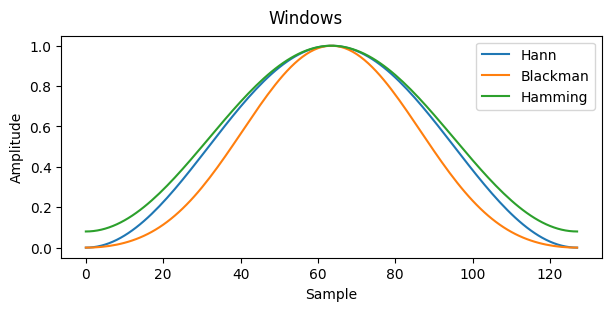

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), layout='constrained')
fig.suptitle('Windows')

ax.plot(Hann, label="Hann")
ax.plot(Blackman, label="Blackman")
ax.plot(Hamming, label="Hamming")
# ax.set_title("Windows")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Sample")
ax.legend()

plt.show()

## Problem 2: STFT for speech signal spectral analysis
Download the “dft.wav” file from the course website, and figure out some information of the .wav file by using ‘wavread’ command in Matlab. E.g. find out the sampling rate and the length of the recording (in second); hear the speech by using either ‘sound’ or ‘wavplay’ command in Matlab.


In [17]:
import scipy.io
import scipy.signal
import numpy.ma as ma

# Load MATLAB file
word_sample = scipy.io.loadmat('/content/gdrive/MyDrive/Colab Notebooks/Colab data/wordSample.mat')
Fs, data = scipy.io.wavfile.read('/content/gdrive/MyDrive/Colab Notebooks/Colab data/dft.wav')
# Python reads the data out as a 16 Bit integer instead of a 32-bit floating point so we need to normalize our data between 1 and -1 by dividing by 32768 (2^15)
data = data/32768


### (a) Demonstrate the time and frequency domain representations of the speech signals.
Download the data file ‘wordSample.mat’, which is part of the above speech data
with the same sampling rate, and load it into Matlab (e.g. load wordSample.mat).
Plot the data, plot the autocorrelation sequence.


In [18]:
acor = np.correlate(data, data, 'full')

ts = np.arange(0, len(data)/Fs, 1/Fs)

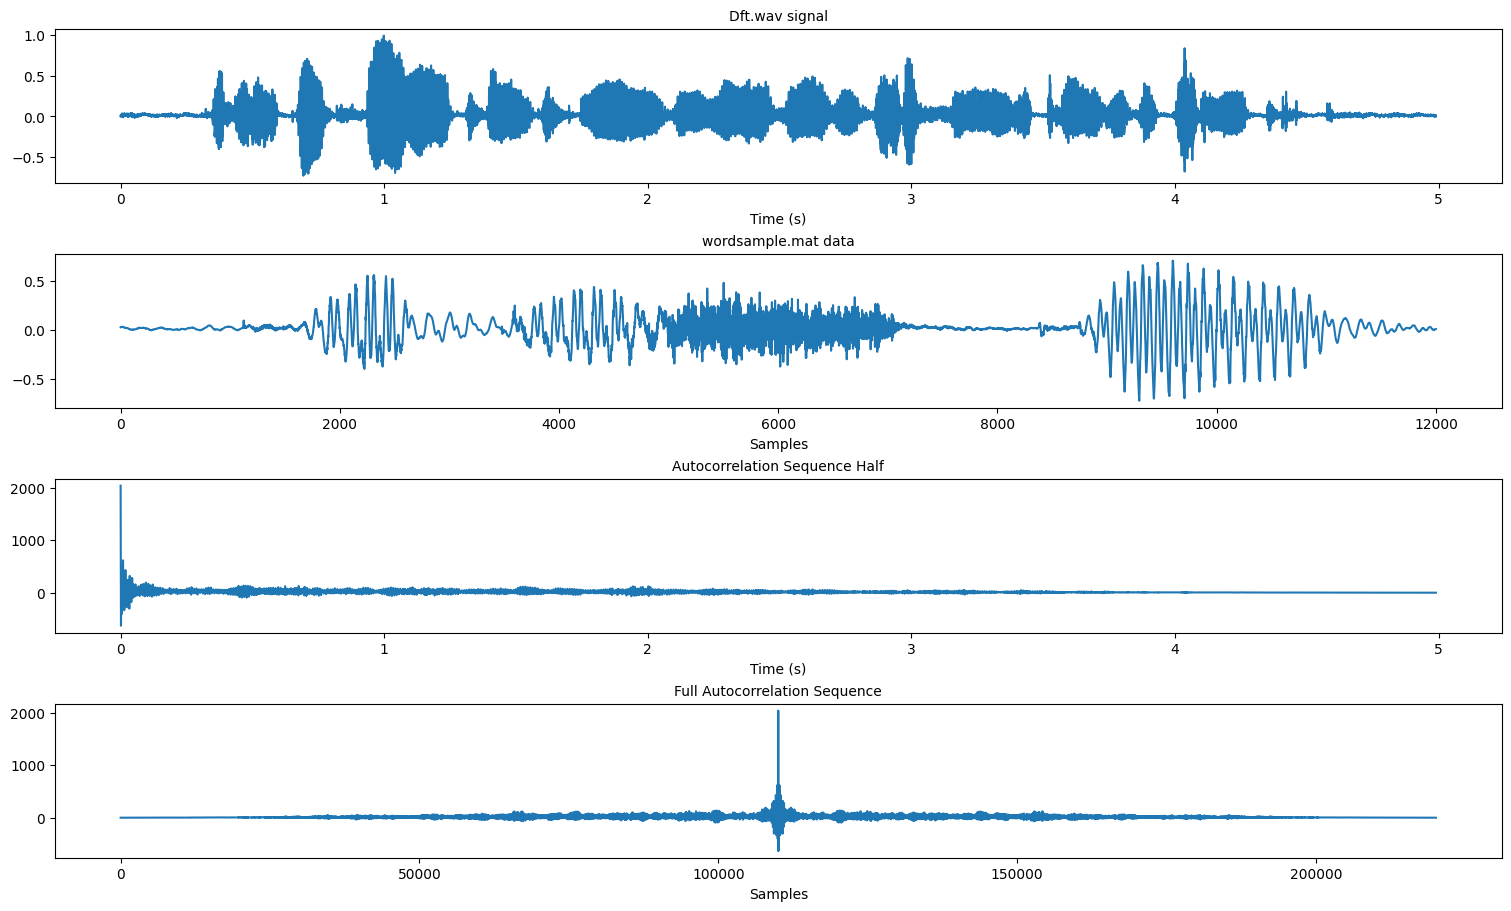

In [19]:
fig, ax = plt.subplots(4, 1, figsize=(15, 9), layout='constrained')
# fig.suptitle('Signals for N = 128')

ax[0].set_title('Dft.wav signal', fontsize='medium')
ax[0].set_xlabel('Time (s)')
ax[0].plot(ts, data)

ax[1].set_title('wordsample.mat data', fontsize='medium')
ax[1].set_xlabel('Samples')
ax[1].plot(word_sample['yy'])

ax[2].set_title('Autocorrelation Sequence Half', fontsize='medium')
ax[2].set_xlabel('Time (s)')
ax[2].plot(ts, acor[len(data)-1:])

ax[3].set_title('Full Autocorrelation Sequence', fontsize='medium')
ax[3].set_xlabel('Samples')
ax[3].plot(acor)
plt.show()



The auto correlation sequence of a sound is symmetrical so when observing it we only really need to look at 1 half of it.
From what i understand we are able to use the autocorrelation sequence to derive pitch in sound. Since autocorrelation finds repeated patterns within a signal


Some useful links to describe why the autocorrelation of a sound signal is useful:
- [dsp stack exchange](https://dsp.stackexchange.com/questions/386/autocorrelation-in-audio-analysis)
- [autocorrelation tutorial](https://musicinformationretrieval.com/autocorrelation.html#:~:text=The%20autocorrelation%20is%20used%20to,pitch%20in%20a%20musical%20signal.)

### (b) Plot the STFT-based time-varying spectrum of the speech signal, using the data in ‘wordSample.mat’.
Make the window length (i.e. the length of each segment) to be 22.5 milliseconds (i.e. the window length N=Fs*22.5/1000).

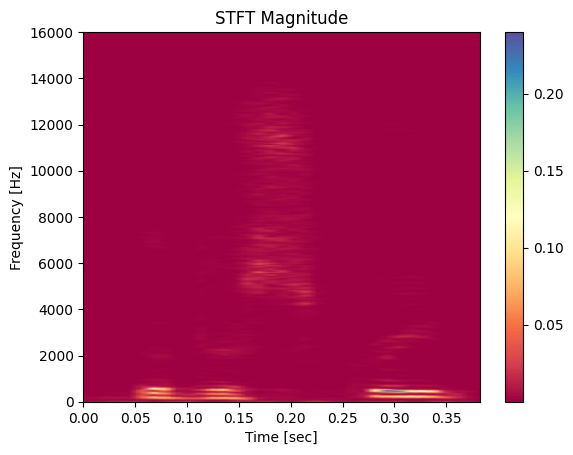

In [34]:
N = Fs*22.5/1000
f, t, Zxx = scipy.signal.stft(np.transpose(word_sample['yy']), Fs, nperseg=round(N), scaling='spectrum')
pc = plt.pcolormesh(t, f, np.abs(Zxx[0]), shading='gouraud', cmap='Spectral')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
fig.colorbar(pc)

plt.show()

The STFT plot is essentially a spectrograph of the signal we are observing. It tells us the approximate power of the frequency component of the signal at that moment in time. The same signal is plotted below to give some idea of how the spectrum lines up.

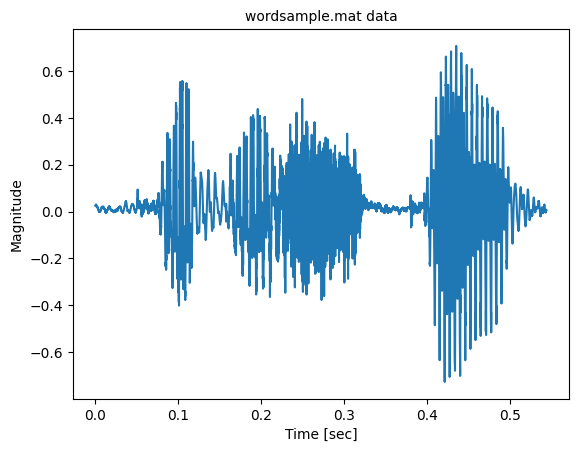

In [22]:

plt.title('wordsample.mat data', fontsize='medium')
plt.xlabel('Time [sec]')
plt.ylabel('Magnitude')
plt.plot(ts[0:len(word_sample['yy'])], word_sample['yy'])


# Appendix

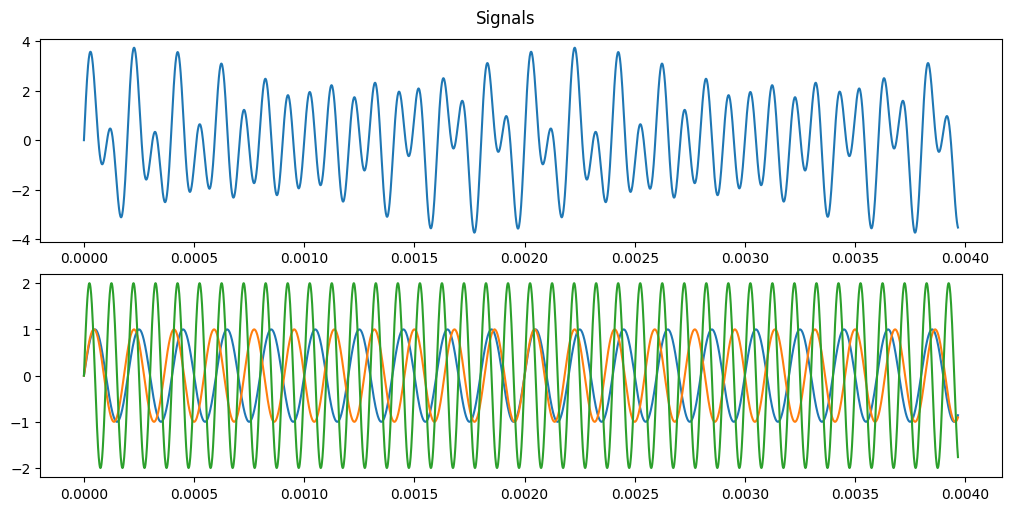

In [35]:
# Define frequencies
f1 = 5000; f2 = 5500; f3 = 10000;
Fs = 32000;
t = np.arange(0, 127*1/Fs, 0.05/Fs)
y = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 2*np.sin(2*np.pi*f3*t);
y1 = np.sin(2*np.pi*f1*t);
y2 = np.sin(2*np.pi*f2*t);
y3 = 2*np.sin(2*np.pi*f3*t);


fig, ax = plt.subplots(2, 1, figsize=(10, 5), layout='constrained')
fig.suptitle('Signals')

# ax.set_title('x(n) N=128', fontsize='medium')
# ax.set_ylabel('y(n)')
ax[0].plot(t, y)

ax[1].plot(t, y1)
ax[1].plot(t, y2)
ax[1].plot(t, y3)



plt.show()